# Lab 1: Pendulum

The purpose of this lab is to measure readings from a pendulum. An analog discovery is connected to the analog potentiometer, which is coupled to the pendulum.

In [1]:
import pandas as pd
%matplotlib inline

In [2]:
# Read Raw Data

raw_data_filename = 'pendulum_scope_raw.csv'

# Calibration data is a lookup table formatted in (angle in degrees, voltage)
calibration_data = [
    (-80, 0.73),
    (-60, 0.68),
    (-40, 0.62),
    (-20, 0.56),
    (0, 0.50),
    (20, 0.44),
    (40, 0.38),
    (60, 0.32),
    (80, 0.26)
]

### Raw Data

The raw data gathered was from the oscilloscope function of the Analog Discovery. This captured the voltage output from the potentiometer over time.

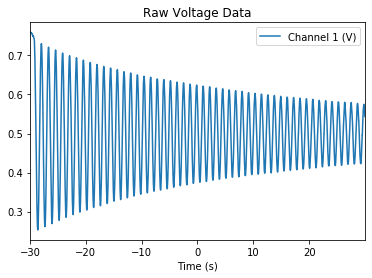

In [3]:
# Read data
data = pd.read_csv(raw_data_filename)
data.plot('Time (s)', 'Channel 1 (V)', title='Raw Voltage Data')

### Potentiometer calibration

The potentiometer was calibrated by taking the voltage readings at specific angles, in 20 degree increments. Zero degrees was defined as the pendulum pointing straight down, and a positive angle was defined as the pendulum on the right side of the vertical. Assuming a linear fit, the angle can be found using a generic linear equation.

$ m = {{y_2 - y_1} \over {x_2 - x_1}} $

$ y - y_1 = m (x - x_1)$

$ y = m (x - x_1) + y_1 $

In [4]:
def lookup_angle(voltage, calibration_data=calibration_data):
    m = (calibration_data[-1][0] - calibration_data[0][0]) / (calibration_data[-1][1] - calibration_data[0][1])
    output_angle = m * (voltage - calibration_data[0][1]) + calibration_data[0][0]
    return output_angle

### Convert data to angles

To get useful data out of the raw data, we must convert the raw voltages into angles, based on the calibration table.

In [5]:
# Generate dataframe in angles

angles = []

for i in data['Channel 1 (V)']:
    angles.append(lookup_angle(i))

data.insert(2, 'Angle (deg)', angles, True)

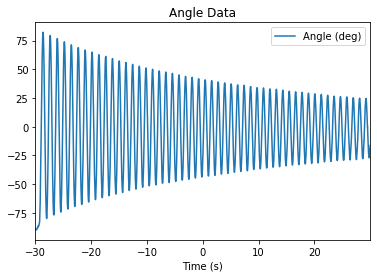

In [6]:
# Plot angle data
data.plot('Time (s)', 'Angle (deg)', title='Angle Data')

### Conclusion

The data from this lab met the expectations of a pendulum in the real world. Fortunately, there was little electrical noise, so the signal was fairly clean. There was a significant decrease in amplitude as time increased, but this is expected from the mechanical friction inherent to the system.